In [3]:
import os
from typing import List, DefaultDict
from collections import defaultdict
import pandas as pd
import numpy as np
from  scipy.signal import correlate2d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# from numpy.linalg import norm
# import matplotlib
from matplotlib import pyplot as plt
from clearn.experiments.experiment import Experiment, get_model, MODEL_TYPE_VAE_SEMI_SUPERVISED_MNIST, get_train_val_iterator
from clearn.dao.dao_factory import get_dao


import tensorflow as tf
from clearn.utils.data_loader import TrainValDataIterator
from clearn.utils.data_loader import load_images
from clearn.utils.utils import get_latent_vector_column, show_all_variables, get_pmf_y_given_z,get_significant_dimensions
from clearn.config.common_path import get_encoded_csv_file
from clearn.models.classify.classifier import ClassifierModel
from clearn.config import ExperimentConfig
from clearn.analysis.encode_decode import decode, encode, encode_and_get_features, decode_and_get_features, decode_l3
from clearn.analysis.cluster_utils import plot_features, trace_dim
from matplotlib import pyplot  as  plt

%matplotlib inline

In [14]:
recompute_feature_vectors = False
z_dim = 10
run_id = 45
ROOT_PATH= "/Users/sunilv/concept_learning_exp"
create_split = False
num_cluster_config=ExperimentConfig.NUM_CLUSTERS_CONFIG_ELBOW

experiment_name = "semi_sup_gaussian_mah_k10"
num_units=[64, 128, 32]
#num_units = [16, 32, 8]

create_split = False
num_cluster_config=ExperimentConfig.NUM_CLUSTERS_CONFIG_ELBOW

exp_config = ExperimentConfig(root_path=ROOT_PATH,
                               num_decoder_layer=4,
                               z_dim=z_dim,
                               num_units=num_units,
                               num_cluster_config=num_cluster_config,
                               confidence_decay_factor=10,
                               beta=5,
                               supervise_weight=150,
                               dataset_name="mnist",
                               split_name="Split_1",
                               model_name="VAE",
                               batch_size=64,
                               eval_interval_in_epochs=1,
                               name=experiment_name,
                               num_val_samples=128,
                               total_training_samples=60000,
                               manual_labels_config=ExperimentConfig.USE_CLUSTER_CENTER,
                               reconstruction_weight=1,
                               activation_hidden_layer="RELU",
                               activation_output_layer="SIGMOID")
exp_config.check_and_create_directories(run_id)
dao = get_dao(exp_config.dataset_name, exp_config.split_name, exp_config.num_val_samples)

In [15]:
exp_config.Z_DIM

10

In [5]:
def get_mean(i,df,mean_col_names):
    df_0 = df[df["label"] == i]
    mu_0 = df_0[mean_col_names].values
    mu_0 = mu_0.mean(axis=0)
    return mu_0

In [6]:
def plot_latent_vector(df, labels):
    figure = plt.figure(figsize=(20,10))
    for label in labels:
        mu_mean = get_mean(label, df,mean_col_names)
        plt.plot(mu_mean,label=str(label))
    plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.xticks(xticks)
    plt.grid(which="major",axis="both")
    plt.title(title)


In [29]:
def plot_latent_vector_runs(run_ids, labels, mean_col_names):
    figure = plt.figure(figsize=(20, 10))

    for label in labels:
        for run_id in run_ids:
            # Read the encoding for this run
            exp = Experiment(1, experiment_name, exp_config, run_id)
            exp_config.check_and_create_directories(run_id, False)
            filename  = get_encoded_csv_file(exp_config, 5, "train")

            df = pd.read_csv(os.path.join(exp_config.ANALYSIS_PATH, filename))
            mu_mean = get_mean(label, df, mean_col_names)
            plt.plot(mu_mean, label=str(label))
    plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.xticks(xticks)
    plt.grid(which="major",axis="both")
    plt.title("Latent vectors")


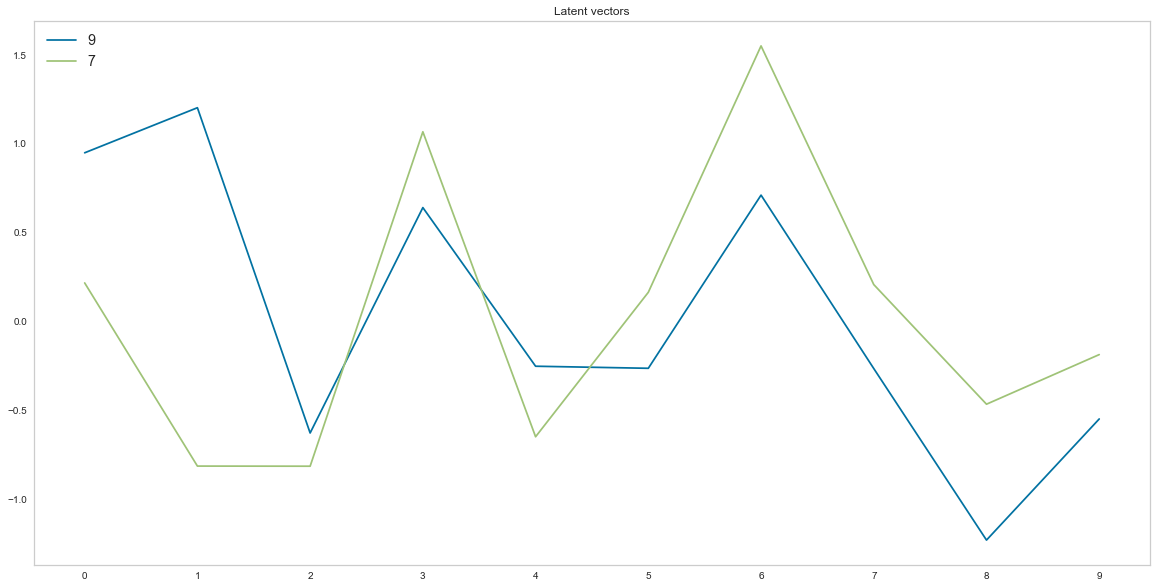

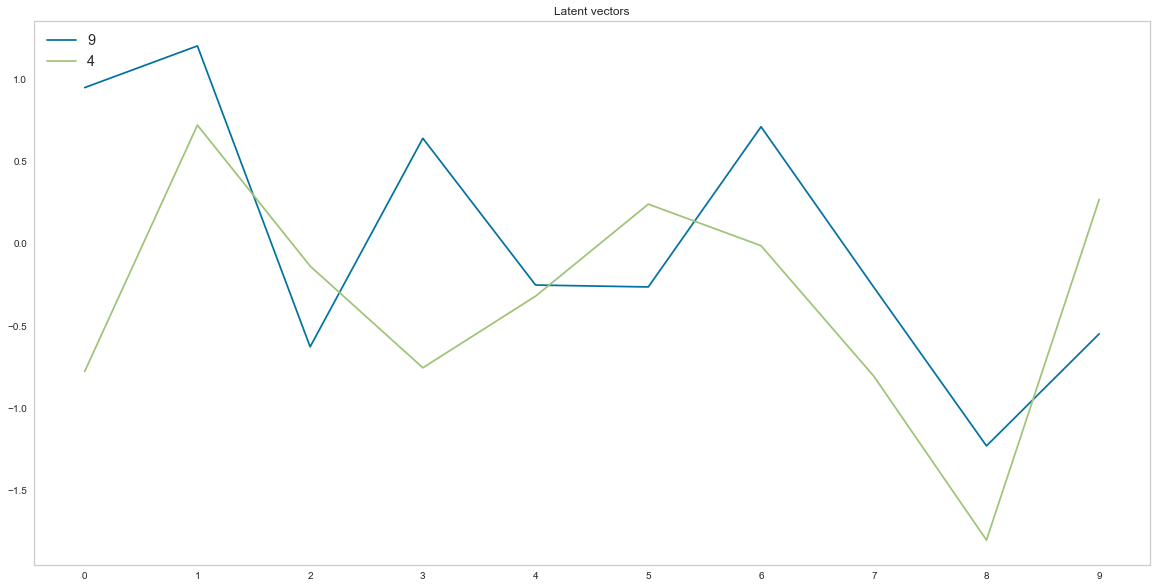

In [34]:
run_ids = [45]
mean_col_names, sigma_col_names, z_col_names,_ = get_latent_vector_column(exp_config.Z_DIM)
xticks = np.arange(0, exp_config.Z_DIM, 1)
plot_latent_vector_runs(run_ids, [9, 7], mean_col_names)
plot_latent_vector_runs(run_ids, [9, 4], mean_col_names)

epochs_completed= 5
    

In [15]:

filename  = get_encoded_csv_file(N_2, N_3, exp_config.Z_DIM, "val")
df = pd.read_csv(os.path.join(exp_config.ANALYSIS_PATH, filename))


# Plot latent vector for zero

In [16]:
mean_col_names, sigma_col_names, z_col_names = get_latent_vector_column(exp_config.Z_DIM)
xticks = np.arange(0,Z_DIM,1)
title = "z_dim={} n_3={} n_2={}".format(Z_DIM, N_3, N_2)

Text(0.5,1,'z_dim=10 n_3=32 n_2=128')

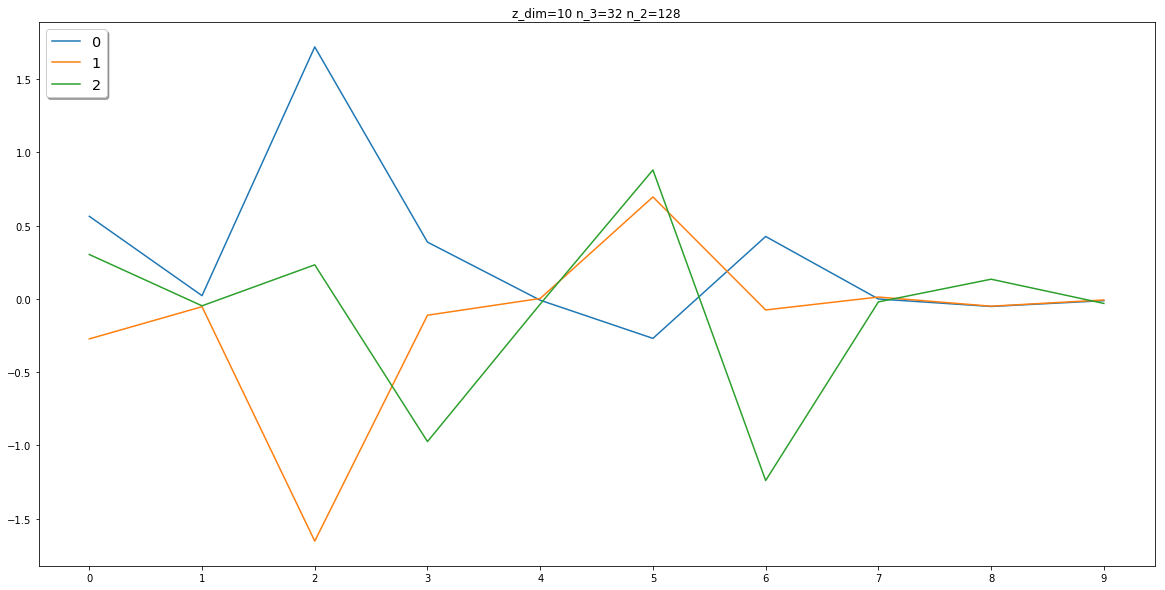

In [19]:
figure = plt.figure(figsize=(20,10))
for i in [0,1,2]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title)

Text(0.5,1,'z_dim=10 n_3=32 n_2=128')

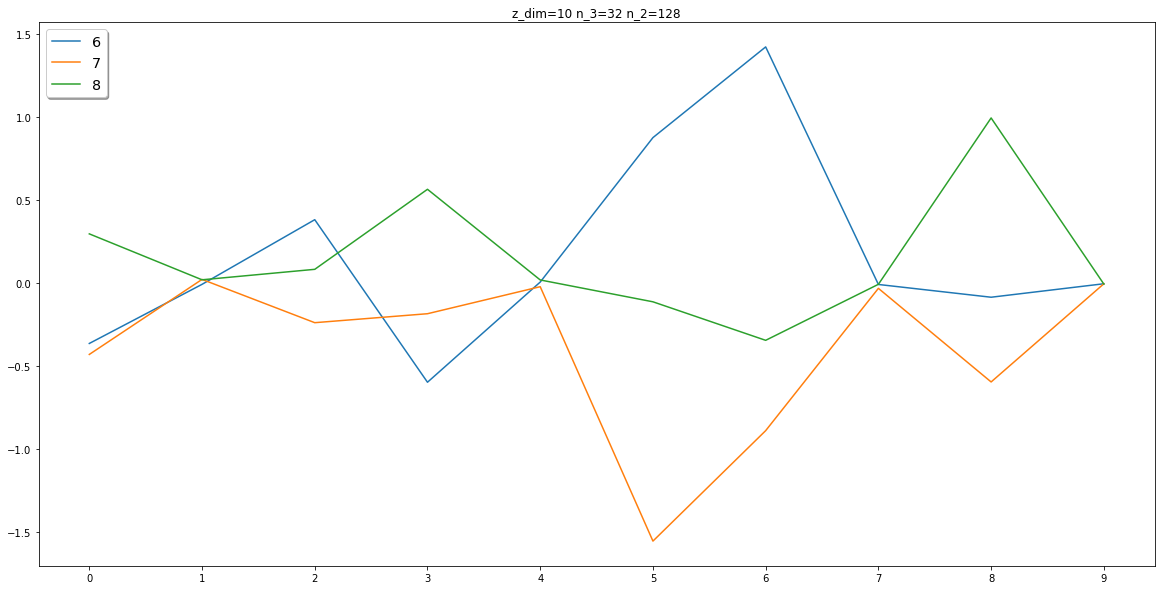

In [18]:
figure = plt.figure(figsize=(20,10))
for i in [6, 7, 8]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title) 

Text(0.5,1,'z_di  =5 n_3=32 n_2=128')

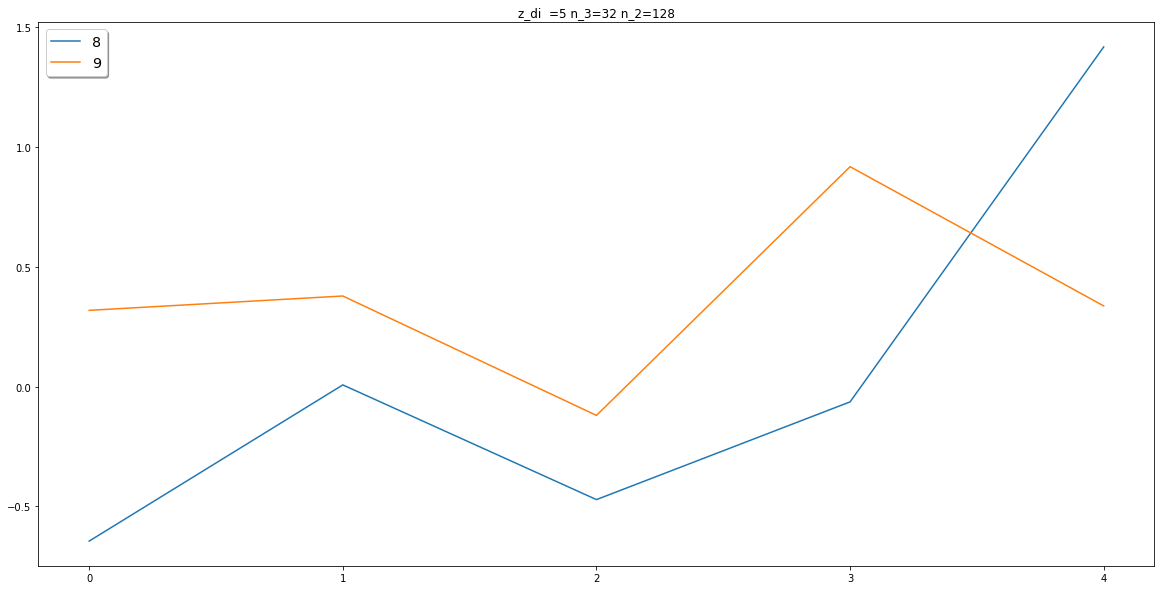

In [16]:
figure = plt.figure(figsize=(20,10))
for i in [8,9]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title)   